In [93]:
import re
import pandas as pd
import numpy as np

In [ ]:
path_datos = '/Users/alba_vu/Desktop/curso20-21/TFG/GitHub/input/'
modelo1 = '/Users/alba_vu/Desktop/curso20-21/TFG/GitHub/DL/Seq_modelo1/'
modelo2 = '/Users/alba_vu/Desktop/curso20-21/TFG/GitHub/DL/Conv1D_modelo2/'
modelo3 = '/Users/alba_vu/Desktop/curso20-21/TFG/GitHub/DL/Conv2D_modelo3/''

## Plot function

Función para representar la función de pérdida y el accuracy en dos gráficas diferentes del modelo correspondiente
Lo guarda en la ruta que se le haya pasado

In [94]:
import numpy as np
import matplotlib.pyplot as plt

def plot(h, ruta):
    LOSS = 0; ACCURACY = 1
    training = np.zeros((2,EPOCHS)); testing = np.zeros((2,EPOCHS))
    training[LOSS] = h.history['loss']
    testing[LOSS] = h.history['val_loss'] # validation loss
    training[ACCURACY] = h.history['accuracy']
    testing[ACCURACY] = h.history['val_accuracy'] # validation accuracy
    epochs = range(1,EPOCHS+1)
    fig, axs = plt.subplots(1,2, figsize=(17,5))
    for i, label in zip((LOSS, ACCURACY),('loss', 'accuracy')):
        axs[i].plot(epochs, training[i], 'b-', label='Training ' + label)
        axs[i].plot(epochs, testing[i], 'y-', label='Validation ' + label)
        axs[i].set_title('Training and validation ' + label)
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel(label)
        axs[i].legend()
    plt.savefig(ruta)
    plt.show()

## Función Confusion Matrix

Función que dibuja la matriz de confusión y la guarda en el parametro que se le pasa como ruta

In [95]:
def plot_confusion_matrix(cm, classes,ruta,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(ruta)

## Preparación de los datos

## 1- Dinucleótidos
Se preparan los datos de dinucleótidos con el objeto creado a tal uso, un objeto .pickle y luego se añade la variable objetivo y con el dataset correspondiente

In [96]:
import pickle
with open(path_datos+"dinuc2.pickle","rb") as f:
    data = pickle.load(f)

In [97]:
import numpy as np
x = np.array(data)

In [98]:
import pandas as pd
total = pd.read_csv(path_datos+'dinucTotal2.csv')
from sklearn.model_selection import train_test_split
y = total['nucleosoma'].astype('float')
X = x

In [99]:
X_train = X[0:round(.8*len(X))]
X_validate = X[round(.8*len(X))+1:round(.9*len(X))]
X_test = X[round(.9*len(X))+1:len(X)]
y_train = y[0:round(.8*len(y))]
y_validate = y[round(.8*len(y))+1:round(.9*len(y))]
y_test = y[round(.9*len(y))+1:len(y)]

In [100]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_validate = tf.keras.utils.to_categorical(y_validate, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [101]:
X_train.shape

(87998, 149, 17)

## Modelo1 - Modelo Secuencial Dense

In [10]:
### Volvemos a cambiar los datos para el modelo Secuencial con capas densas
## El modelo Dense necesita recibir un vector como entrada por lo que se va a redimensionar los datos
x_Train = X_train.reshape(X_train.shape[0], 149*17).astype('float32')
x_Validate = X_validate.reshape(X_validate.shape[0], 149*17).astype('float32')
x_Test = X_test.reshape(X_test.shape[0], 149*17).astype('float32')

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(100, input_dim=149*17, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
print(model.summary())

EPOCHS = 25
model.compile(loss='categorical_crossentropy', optimizer='SGD',
             metrics=['accuracy'])
history = model.fit(x_Train, y_train, validation_data = (x_Validate, y_validate),
                   epochs = EPOCHS, batch_size = 256, verbose=1)
model.save(modelo1+'modeloDL_SeqDinuc_final.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               253400    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 253,602
Trainable params: 253,602
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25
344/344 [==============================] - 11s 5ms/step - loss: 0.7068 - accuracy: 0.5347 - val_loss: 0.6563 - val_accuracy: 0.6156
Epoch 2/25
344/344 [==============================] - 1s 4ms/step - loss: 0.6622 - accuracy: 0.6017 - val_loss: 0.6261 - val_accuracy: 0.6693
Epoch 3/25
344/344 [==============================] - 1s 4ms/step - loss: 0.6346 - accurac

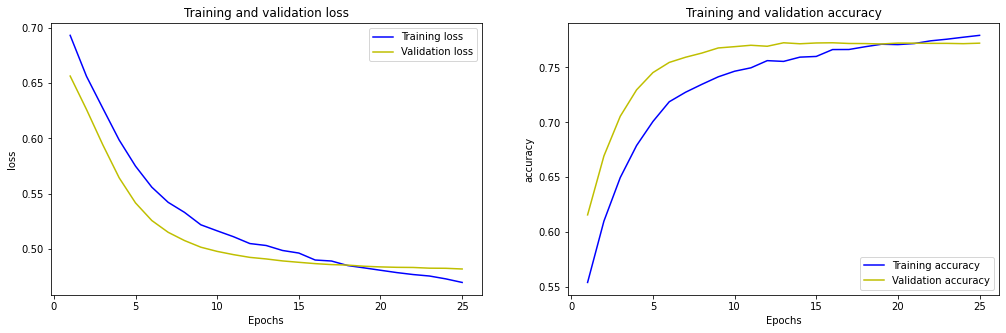

In [12]:
plot(history, modelo1+'SeqDinuc_final_SGD')

Confusion matrix, without normalization
[[4913 1151]
 [1355 3580]]


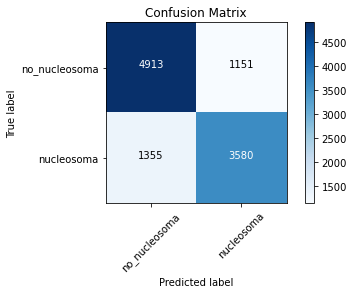

In [13]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

X_Test = X_test.reshape(X_test.shape[0], 149*17).astype('float32')
y_score = model.predict(X_Test)
y_score = pd.DataFrame(y_score)
# Aqui lo que hacemos es establecer un threshold para una categoría u otra (0-1)
# No se puede meter en la matriz de confusión si no hacemos este paso prrevio

seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,0]))
seq_predictions2 = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,1]))
seq_predictions = pd.DataFrame(seq_predictions)
seq_predictions2 = pd.DataFrame(seq_predictions2)
seq_predictions = pd.concat([seq_predictions,seq_predictions2],axis=1)
seq_predictions.columns = ['0','1']

y_test = pd.DataFrame(y_test)
seq_predicitions = pd.DataFrame(seq_predictions)
nucleosomaTest = y_test[1]
nucleosomaPredict = seq_predictions.iloc[:,1]

cm1 = confusion_matrix(y_true=nucleosomaTest, y_pred=nucleosomaPredict)

cm_plot_labels = ['no_nucleosoma','nucleosoma']
plot_confusion_matrix(cm=cm1, classes=cm_plot_labels, title='Confusion Matrix', ruta=modelo1+'CM_SeqDinuc_final_SGD.png')

In [14]:
loss, acc = model.evaluate(X_Test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))


Testing loss: 0.4819011986255646, acc: 0.7721611261367798



344/344 - 0s - loss: 0.7663 - accuracy: 0.7868
Modelo 1, accuracy: 78.68%


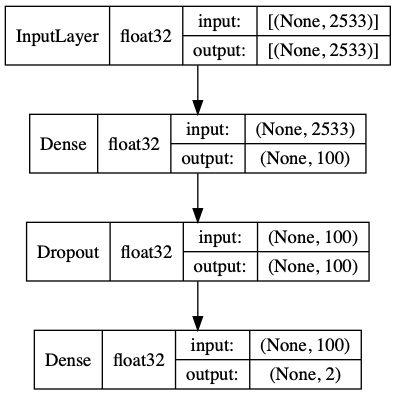

In [45]:
from keras.models import load_model
import tensorflow as tf

new_model = load_model(modelo1+'modeloDL_SeqDinuc_final.h5')

# Re-evaluate the model
loss, acc = new_model.evaluate(x_Test, y_test, verbose=2)
print("Modelo 1, accuracy: {:5.2f}%".format(100 * acc))

tf.keras.utils.plot_model(new_model, to_file=modelo1+'Seq_dinuc.png', show_shapes=True, show_dtype=True, show_layer_names=False)

## Modelo 2 - Modelo Conv2D

In [102]:
##Se vuelve a redimensionar esta vez para que pueda ser una entrada por cada secuencia de 3 dimensiones (alto, ancho, número de canales)
x_Train = X_train.reshape(X_train.shape[0], 149,17,1).astype('float32')
x_Validate = X_validate.reshape(X_validate.shape[0], 149,17,1).astype('float32')
x_test = X_test.reshape(X_test.shape[0], 149,17,1).astype('float32')

In [104]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu',
input_shape=(149,17,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
print(model.summary())

EPOCHS = 20
model.compile(loss='categorical_crossentropy', optimizer='SGD',
metrics=['accuracy'])
history = model.fit(x_Train, y_train, validation_data=(x_Validate, y_validate),
epochs=EPOCHS, batch_size=128, verbose=1)
model.save(modelo2+'modeloDL_Conv2D_dinuc_final.h5')


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 147, 15, 16)       160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 7, 16)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 5, 64)         9280      
_________________________________________________________________
flatten_7 (Flatten)          (None, 22720)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                727072    
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 736,578
Trainable params: 736,578
Non-trainable params: 0
________________________________________________

344/344 - 1s - loss: 0.4421 - accuracy: 0.7956
Modelo 2, accuracy: 79.56%


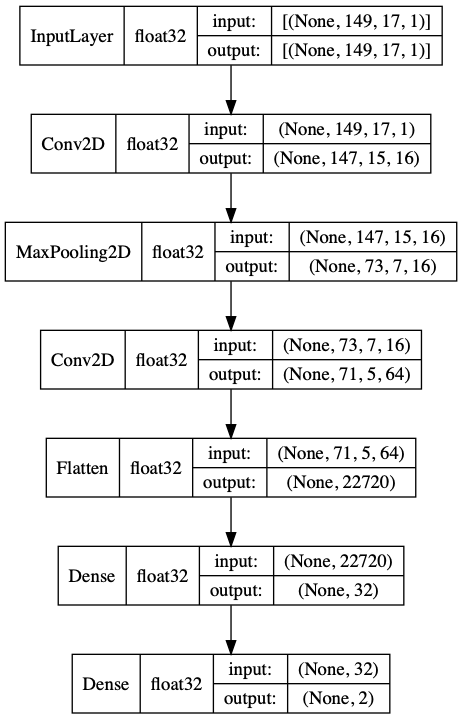

In [106]:
from keras.utils.vis_utils import plot_model
from keras.models import load_model
import tensorflow as tf

new_model = load_model(modelo2+'modeloDL_Conv2D_dinuc_final.h5')

# Re-evaluate the model
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print("Modelo 2, accuracy: {:5.2f}%".format(100 * acc))

plot_model(new_model, to_file=modelo2+'conv2D_dinuc.png', show_shapes=True, show_dtype=True, show_layer_names=False)

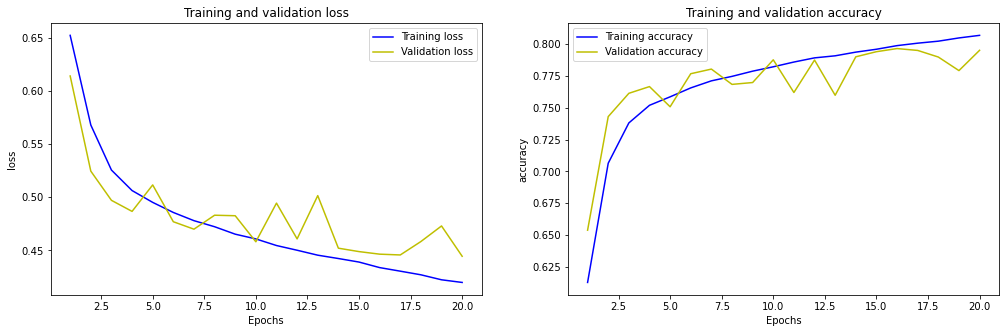

In [109]:
plot(history, modelo2+'SeqDinuc_final_SGD')

Confusion matrix, without normalization
[[5125  939]
 [1309 3626]]


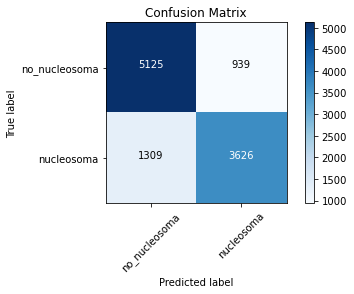

In [111]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#X_Test = X_test.reshape(X_test.shape[0], 149*17).astype('float32')
y_score = model.predict(x_test)
y_score = pd.DataFrame(y_score)
# Aqui lo que hacemos es establecer un threshold para una categoría u otra (0-1)
# No se puede meter en la matriz de confusión si no hacemos este paso prrevio

seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,0]))
seq_predictions2 = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,1]))
seq_predictions = pd.DataFrame(seq_predictions)
seq_predictions2 = pd.DataFrame(seq_predictions2)
seq_predictions = pd.concat([seq_predictions,seq_predictions2],axis=1)
seq_predictions.columns = ['0','1']

y_test = pd.DataFrame(y_test)
seq_predicitions = pd.DataFrame(seq_predictions)
nucleosomaTest = y_test[1]
nucleosomaPredict = seq_predictions.iloc[:,1]

cm1 = confusion_matrix(y_true=nucleosomaTest, y_pred=nucleosomaPredict)

cm_plot_labels = ['no_nucleosoma','nucleosoma']
plot_confusion_matrix(cm=cm1, classes=cm_plot_labels, title='Confusion Matrix', ruta=modelo2+'CM_SeqDinuc_final_SGD.png')

## Modelo 3 - Modelo Conv1D

In [42]:
#========================= Model ==============================================
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.layers import Conv1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [43]:
EPOCHS = 30
model=Sequential()
model.add(Conv1D(filters=20,kernel_size=10,strides=1,padding='valid',input_shape=(149,17), activation='relu'))
model.add(Conv1D(filters=20,kernel_size=10,strides=1,padding='valid', activation='relu'))
model.add(MaxPooling1D(pool_size=10, strides=5, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
history = model.fit(X_train, y_train, batch_size=64, epochs=EPOCHS, verbose=1, validation_data= (X_validate,y_validate) ,callbacks=[early_stopping])
print(history.history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 140, 20)           3420      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 131, 20)           4020      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 20)            0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               69248     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [44]:
model.save(modelo3+'modeloDL_OHE_final_dinuc.h5')

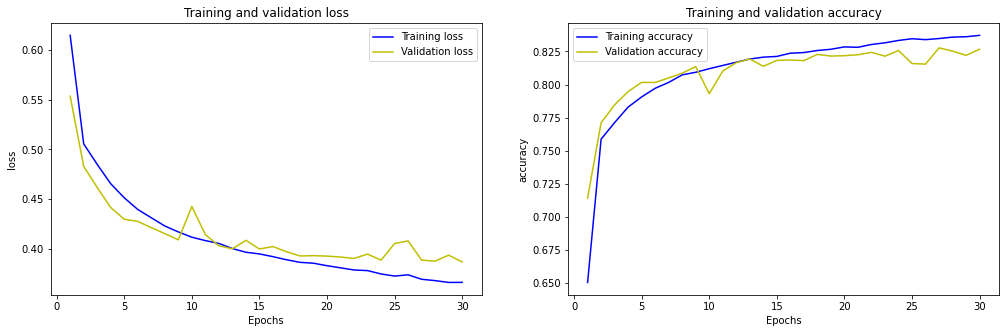

In [50]:
plot(history, modelo3+'Conv1DDinuc_final')

In [51]:
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras

new_model = load_model(modelo3+'modeloDL_OHE_final_dinuc.h5')

# Re-evaluate the model
loss, acc = new_model.evaluate(X_test, y_test, verbose=2)
print("Modelo 2, accuracy: {:5.2f}%".format(100 * acc))

344/344 - 1s - loss: 0.3811 - accuracy: 0.8285
Modelo 2, accuracy: 82.85%


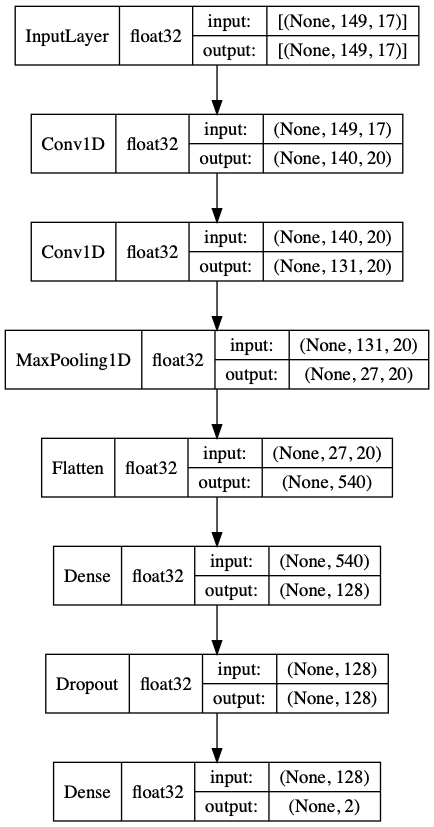

In [52]:
from keras.utils.vis_utils import plot_model
plot_model(new_model,to_file=modelo3+'conv1D_dinuc.png', show_shapes=True, show_dtype=True, show_layer_names=False)

In [54]:
y_score = model.predict(X_test)
y_score = pd.DataFrame(y_score)
# Aqui lo que hacemos es establecer un threshold para una categoría u otra (0-1)
# No se puede meter en la matriz de confusión si no hacemos este paso previo porque sino solo existen probabilidadesa

seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,0]))
seq_predictions2 = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,1]))
seq_predictions = pd.DataFrame(seq_predictions)
seq_predictions2 = pd.DataFrame(seq_predictions2)
seq_predictions = pd.concat([seq_predictions,seq_predictions2],axis=1)
seq_predictions.columns = ['0','1']

yTest = pd.DataFrame(y_test)
seq_predicitions = pd.DataFrame(seq_predictions)
nucleosomaTest = yTest[1]
nucleosomaPredict = seq_predictions.iloc[:,1]

Confusion matrix, without normalization
[[5251  813]
 [1073 3862]]


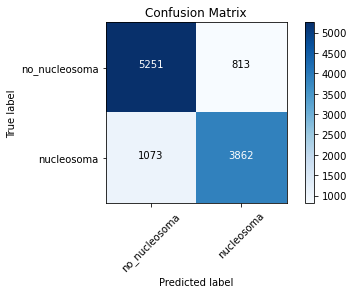

In [55]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=nucleosomaTest, y_pred=nucleosomaPredict)
cm_plot_labels = ['no_nucleosoma','nucleosoma']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', ruta=modelo3+'CM_Conv1DDinuc_final')

## Preparación datos OHE

In [56]:
##Funcion para hacer el one-hot encoding de una secuencia
##Tamaño final: len(secuencia)*4 columnas
## Las columnas van a ser [A,C,G,T,N]
def one_hot_encode(seq):
    mapping = dict(zip("ACGTN", range(5)))    
    seq2 = [mapping[i] for i in seq]
    return np.eye(5)[seq2]

In [57]:
##Lectura de secuencias que no posicionan nucleosomas
df = pd.read_csv(path_datos+'PombeSeq3.csv')
df.rename(columns = {'0':'secuencia'}, inplace = True)
#print(df.shape)
##Lectura de secuencias de NDR
df1 = pd.read_csv(path_datos+'NDRseq2.csv')
#print(df1.shape)
##Concatenamos los dos dataframes
df = pd.concat([df, df1], axis=0)
df['nucleosoma'] = 0

In [58]:
#Secuencias que posicionan nucleosomas
nuc = pd.read_csv(path_datos+'NucleocSeq.csv')
nuc.drop(columns=['chromosome', 'posInic'],inplace=True)
nuc['nucleosoma'] = 1

In [59]:
## Mezclamos las filas (el orden) 
##Cogemos el tamaño igual que las secuencias de nucleosomas para los no nucleosomas
df = df.sample(frac=1).reset_index(drop=True)
df = df.iloc[0:nuc.shape[0],:]
#Concatenamos ambos dataFrame para tener todos el conjunto de datos unido y mezclamos filas de nuevo
total = pd.concat([df,nuc],axis=0) 
total = total.sample(frac=1).reset_index(drop=True)

## Train-test split

In [60]:
#np.split funciona cogiendo el %que quitamos del total y luego de lo que queda el otro %
#En nuestro caso va a ser 80% train, 10% validate y 10% test
train, validate, test = np.split(total.sample(frac=1, random_state=42), 
                       [int(.8*len(total)), int(.9*len(total))])

X_train = train['secuencia']
y_train = train['nucleosoma']
X_validate = validate['secuencia']
y_validate = validate['nucleosoma']
X_test = test['secuencia']
y_test = test['nucleosoma']

In [61]:
X_train = pd.DataFrame(X_train)
X_validate = pd.DataFrame(X_validate)
X_test = pd.DataFrame(X_test)

In [62]:
#Funcion para convertir un data frame de dimensiones (x,1) a ONE_HOT_ENCODING vector
def df_to_OHE(df):
    lista = []
    for i in range(df.shape[0]):
        seq = one_hot_encode(df.iloc[i,0])
        lista.append(seq)
    return lista

In [63]:
#####################################################
# PREPARACIÓN DE LOS X DATA SETS
#####################################################
xTrain = df_to_OHE(X_train)
xValidate = df_to_OHE(X_validate)
xTest = df_to_OHE(X_test)

In [64]:
from keras.utils import np_utils
#####################################################
# PREPARACIÓN DE LOS Y (TARGET) DATA SETS
#####################################################
yTrain = np_utils.to_categorical(y_train)
yValidate = np_utils.to_categorical(y_validate)
yTest = np_utils.to_categorical(y_test)

In [65]:
## Convertir to numpy array
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xValidate = np.array(xValidate)
yValidate = np.array(yValidate)
xTest = np.array(xTest)
yTest = np.array(yTest)

## Modelo 1 - MODELO SECUENCIAL DENSE

In [25]:
### Volvemos a cambiar los datos para el modelo Secuencial con capas densas
x_Train = xTrain.reshape(xTrain.shape[0], 150*5).astype('float32')
x_Validate = xValidate.reshape(xValidate.shape[0], 150*5).astype('float32')

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(100, input_dim=150*5, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
print(model.summary())

EPOCHS = 100
model.compile(loss='categorical_crossentropy', optimizer='SGD',
             metrics=['accuracy'])
history = model.fit(x_Train, yTrain, validation_data = (x_Validate, yValidate),
                   epochs = EPOCHS, batch_size = 256, verbose=1)
model.save(modelo1+'modeloDL_Seq_final_SGD.h5')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               75100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 202       
Total params: 75,302
Trainable params: 75,302
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
313/313 [==============================] - 1s 3ms/step - loss: 0.7552 - accuracy: 0.4950 - val_loss: 0.7016 - val_accuracy: 0.5030
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7050 - accuracy: 0.5109 - val_loss: 0.6953 - val_accuracy: 0.5159
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6983 - accur

Epoch 53/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6419 - accuracy: 0.6278 - val_loss: 0.6529 - val_accuracy: 0.6122
Epoch 54/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6407 - accuracy: 0.6287 - val_loss: 0.6515 - val_accuracy: 0.6149
Epoch 55/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6399 - accuracy: 0.6301 - val_loss: 0.6502 - val_accuracy: 0.6169
Epoch 56/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6367 - accuracy: 0.6345 - val_loss: 0.6488 - val_accuracy: 0.6173
Epoch 57/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6347 - accuracy: 0.6353 - val_loss: 0.6470 - val_accuracy: 0.6205
Epoch 58/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6326 - accuracy: 0.6387 - val_loss: 0.6453 - val_accuracy: 0.6215
Epoch 59/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6292 - accuracy: 0.6442 - val_loss: 0.6441 - val_accuracy:

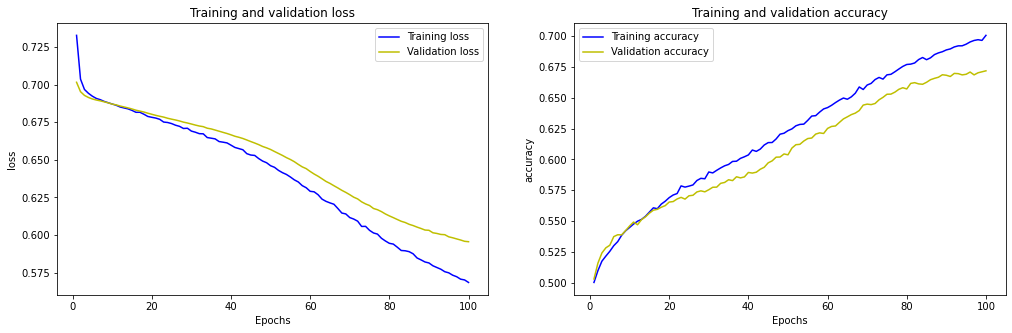

In [35]:
plot(history, modelo1+'Seq_final_SGD')

Confusion matrix, without normalization
[[3650 1386]
 [1895 3069]]


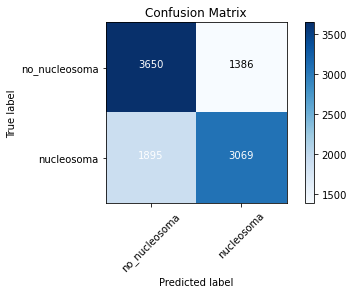

In [36]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

X_Test = xTest.reshape(xTest.shape[0], 750).astype('float32')
y_score = model.predict(X_Test)
y_score = pd.DataFrame(y_score)
# Aqui lo que hacemos es establecer un threshold para una categoría u otra (0-1)
# No se puede meter en la matriz de confusión si no hacemos este paso prrevio

seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,0]))
seq_predictions2 = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,1]))
seq_predictions = pd.DataFrame(seq_predictions)
seq_predictions2 = pd.DataFrame(seq_predictions2)
seq_predictions = pd.concat([seq_predictions,seq_predictions2],axis=1)
seq_predictions.columns = ['0','1']

yTest = pd.DataFrame(yTest)
seq_predicitions = pd.DataFrame(seq_predictions)
nucleosomaTest = yTest[1]
nucleosomaPredict = seq_predictions.iloc[:,1]

cm1 = confusion_matrix(y_true=nucleosomaTest, y_pred=nucleosomaPredict)

cm_plot_labels = ['no_nucleosoma','nucleosoma']
plot_confusion_matrix(cm=cm1, classes=cm_plot_labels, title=modelo1+'CM_Seq_final_SGD.png')

In [37]:
loss, acc = model.evaluate(X_Test, yTest, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))


Testing loss: 0.5952519774436951, acc: 0.6718999743461609



313/313 - 0s - loss: 0.4393 - accuracy: 0.8059
Modelo 1, accuracy: 80.59%


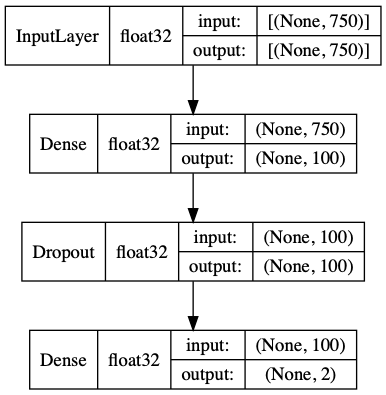

In [74]:
from plot_model import plot_model
from keras.models import load_model
import tensorflow as tf

x_test = xTest.reshape(xTest.shape[0], 150*5).astype('float32')

new_model = load_model(modelo1+'modeloDL_Seq_final.h5')

# Re-evaluate the model
loss, acc = new_model.evaluate(x_test, yTest, verbose=2)
print("Modelo 1, accuracy: {:5.2f}%".format(100 * acc))

tf.keras.utils.plot_model(new_model, to_file=modelo1+'Seq_OHE.png', show_shapes=True, show_dtype=True, show_layer_names=False)

## Modelo 2 - RED CONV2D

In [81]:
##Redimensionado de los datos de entrada para cons
x_Train = xTrain.reshape(xTrain.shape[0], 25,10,3).astype('float32')
x_Validate = xValidate.reshape(xValidate.shape[0], 25,10,3).astype('float32')

In [87]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
input_shape=(25,10,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
print(model.summary())

EPOCHS = 20
model.compile(loss='categorical_crossentropy', optimizer='SGD',
metrics=['accuracy'])
history = model.fit(x_Train, yTrain, validation_data=(x_Validate, yValidate),
epochs=EPOCHS, batch_size=64, verbose=1)
model.save(modelo2+'modeloDL_Conv2D_final.h5')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 23, 8, 32)         896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 4, 32)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 2, 256)         73984     
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 258       
Total params: 665,090
Trainable params: 665,090
Non-trainable params: 0
________________________________________________

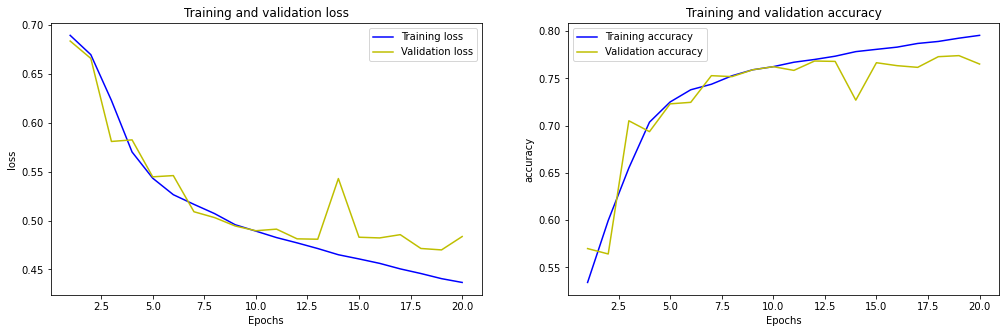

In [88]:
plot(history, modelo2+'Conv2D_final')

[[3446 1520]
 [ 770 4264]]
Confusion matrix, without normalization
[[3446 1520]
 [ 770 4264]]


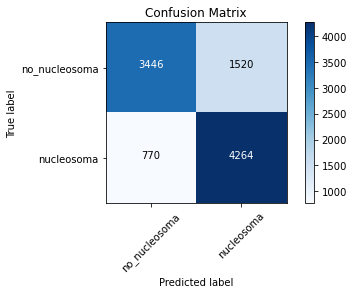

In [89]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

X_Test = xTest.reshape(xTest.shape[0], 25,10,3).astype('float32')
y_score = model.predict(X_Test)
y_score = pd.DataFrame(y_score)
# Aqui lo que hacemos es establecer un threshold para una categoría u otra (0-1)
# No se puede meter en la matriz de confusión si no hacemos este paso prrevio

seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,0]))
seq_predictions2 = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,1]))
seq_predictions = pd.DataFrame(seq_predictions)
seq_predictions2 = pd.DataFrame(seq_predictions2)
seq_predictions = pd.concat([seq_predictions,seq_predictions2],axis=1)
seq_predictions.columns = ['0','1']

yTest = pd.DataFrame(yTest)
seq_predicitions = pd.DataFrame(seq_predictions)
nucleosomaTest = yTest[1]
nucleosomaPredict = seq_predictions.iloc[:,1]

cm = confusion_matrix(y_true=nucleosomaTest, y_pred=nucleosomaPredict)
print(cm)
cm_plot_labels = ['no_nucleosoma','nucleosoma']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', ruta=modelo2+'CM_Conv2D_final.png')

In [90]:
loss, acc = model.evaluate(X_Test, yTest, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))


Testing loss: 0.47636786103248596, acc: 0.7710000276565552



313/313 - 1s - loss: 0.4764 - accuracy: 0.7710
Modelo 1, accuracy: 77.10%


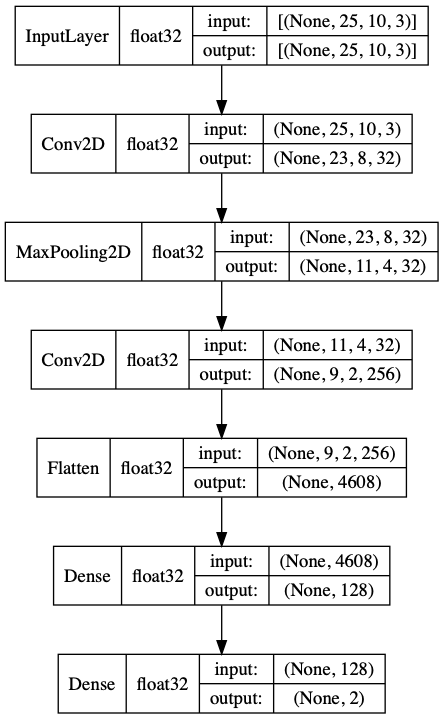

In [92]:
from keras.utils.vis_utils import plot_model
from keras.models import load_model
import tensorflow as tf

x_test = xTest.reshape(xTest.shape[0], 25,10,3).astype('float32')
new_model = load_model(modelo2+'modeloDL_Conv2D_final.h5')

# Re-evaluate the model
loss, acc = new_model.evaluate(x_test, yTest, verbose=2)
print("Modelo 1, accuracy: {:5.2f}%".format(100 * acc))

plot_model(new_model, to_file=modelo2+'conv2D_OHE.png', show_shapes=True, show_dtype=True, show_layer_names=False)

### Modelo 3 - CONV1D
En este caso lo hacemos con dos target (categorical) 

In [66]:
#========================= Model ==============================================
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.layers import Conv1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [67]:
EPOCHS = 15
model=Sequential()
model.add(Conv1D(filters=20,kernel_size=10,strides=1,padding='valid',input_shape=(150,5), activation='relu'))
model.add(Conv1D(filters=20,kernel_size=10,strides=1,padding='valid', activation='relu'))
model.add(MaxPooling1D(pool_size=10, strides=5, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
history = model.fit(xTrain, yTrain, batch_size=64, epochs=EPOCHS, verbose=1, validation_data= (xValidate,yValidate) ,callbacks=[early_stopping])
print(history.history)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 141, 20)           1020      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 132, 20)           4020      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 20)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               69248     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [69]:
###Guardar el modelo
model.save(modelo3+'modeloDL_OHE_finalBis.h5')

In [68]:
y_score = model.predict(xTest)
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))


Testing loss: 0.3964531421661377, acc: 0.8169999718666077



313/313 - 1s - loss: 0.3965 - accuracy: 0.8170
Modelo 3, accuracy: 81.70%


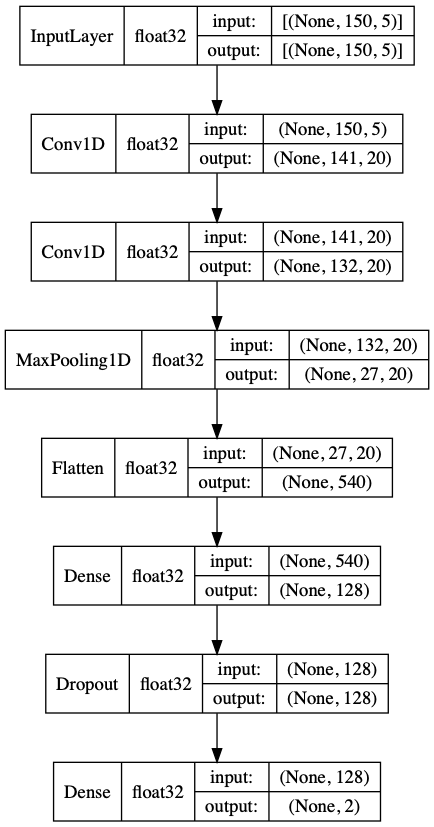

In [70]:
from keras.models import load_model
import tensorflow as tf
from keras.utils.vis_utils import plot_model

new_model = load_model(modelo3+'modeloDL_OHE_finalBis.h5')

# Re-evaluate the model
loss, acc = new_model.evaluate(xTest, yTest, verbose=2)
print("Modelo 3, accuracy: {:5.2f}%".format(100 * acc))

plot_model(new_model, to_file=modelo3+'conv1D_OHEBis.png', show_shapes=True, show_dtype=True, show_layer_names=False)

In [71]:
y_score = pd.DataFrame(y_score)
# Aqui lo que hacemos es establecer un threshold para una categoría u otra (0-1)
# No se puede meter en la matriz de confusión si no hacemos este paso prrevio

seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,0]))
seq_predictions2 = list(map(lambda x: 0 if x<0.5 else 1, y_score.iloc[:,1]))
seq_predictions = pd.DataFrame(seq_predictions)
seq_predictions2 = pd.DataFrame(seq_predictions2)
seq_predictions = pd.concat([seq_predictions,seq_predictions2],axis=1)
seq_predictions.columns = ['0','1']

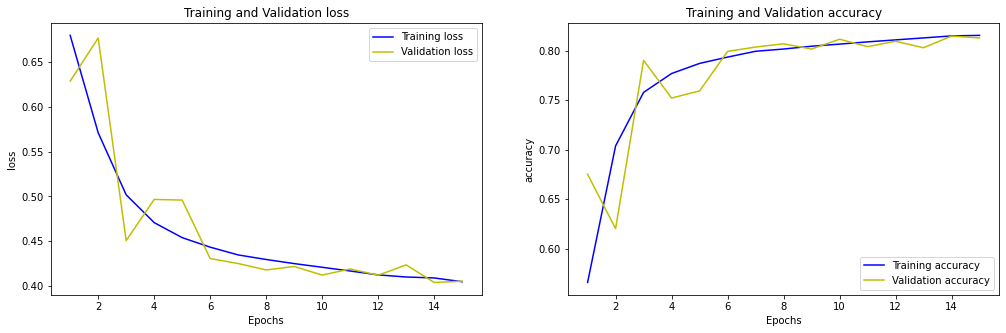

Loss: 0.3964531421661377
Accuracy: 0.8169999718666077


In [72]:
## Representación gráfica
import matplotlib.pyplot as plt
import numpy as np
def graficarLOSS_ACCURACY(h):
    LOSS = 0; ACCURACY = 1
    training = np.zeros((2,EPOCHS)); testing = np.zeros((2,EPOCHS))
    training[LOSS] = h.history['loss']
    testing[LOSS] = h.history['val_loss'] # validation loss
    training[ACCURACY] = h.history['accuracy']
    testing[ACCURACY] = h.history['val_accuracy'] # validation accuracy
    epochs = range(1,EPOCHS+1)
    fig, axs = plt.subplots(1,2, figsize=(17,5))
    for i, label in zip((LOSS, ACCURACY),('loss', 'accuracy')):
        axs[i].plot(epochs, training[i], 'b-', label='Training ' + label)
        axs[i].plot(epochs, testing[i], 'y-', label='Validation ' + label)
        axs[i].set_title('Training and Validation ' + label)
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel(label)
        axs[i].legend()
        plt.savefig(modelo3+'graficas_OHE_finalBis')
    plt.show()
    loss, accuracy = model.evaluate(xTest,yTest,verbose=0)
    print("Loss: " + str(loss))
    print("Accuracy: " + str(accuracy))
graficarLOSS_ACCURACY(history)

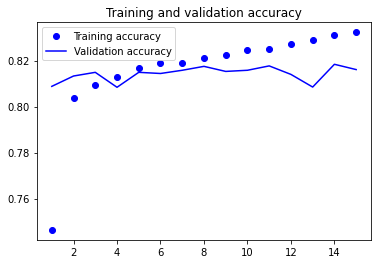

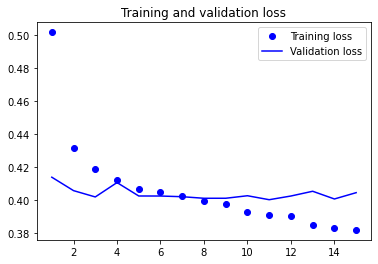

In [50]:
##Plot results 
## Código extraído de DEEP LEARNING with Pyhton FranÇois Chollet
def graficar2(h):
    acc = h.history['accuracy']
    val_acc = h.history['val_accuracy']
    loss = h.history['loss']
    val_loss = h.history['val_loss']

    epochs = range(1,len(acc)+1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

    plt.title('Training and validation accuracy')
    plt.legend()
    plt.savefig(modelo3+'graficas2accuracy_OHE_finalBis')
    plt.figure()

    plt.plot(epochs, loss,'bo',label='Training loss')
    plt.plot(epochs, val_loss, 'b',label ='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.savefig(modelo3+'graficas2loss_OHE_finalBis')
    plt.show()
graficar2(history)

In [73]:
yTest = pd.DataFrame(yTest)
seq_predicitions = pd.DataFrame(seq_predictions)
nucleosomaTest = yTest[1]
nucleosomaPredict = seq_predictions.iloc[:,1]

In [74]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [75]:
cm = confusion_matrix(y_true=nucleosomaTest, y_pred=nucleosomaPredict)

In [76]:
print(cm)

[[4257  709]
 [1121 3913]]


In [77]:
def plot_confusion_matrix(cm, classes,ruta,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(ruta)

In [78]:
cm_plot_labels = ['no_nucleosoma','nucleosoma']

Confusion matrix, without normalization
[[4257  709]
 [1121 3913]]


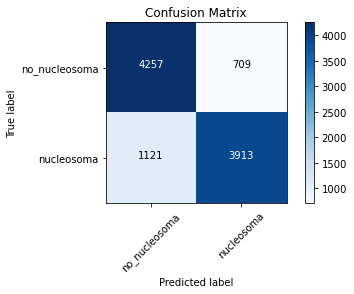

In [80]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', ruta = modelo3+'CM_conv1D_OHE')